# 31. Installation des dépendances

In [1]:
!pip install tensorflow tensorflow_datasets matplotlib numpy

# 2. Chargement du Dataset EuroSAT

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

# Chargement du dataset EuroSAT (RGB), split unique 'train'
ds_full, ds_info = tfds.load(
    'eurosat/rgb',
    split='train',
    with_info=True,
    as_supervised=True,
    shuffle_files=True
)

# Fractionner en 80% train et 20% test
train_size = 0.8
ds_train = ds_full.take(int(train_size * ds_info.splits['train'].num_examples))
ds_test = ds_full.skip(int(train_size * ds_info.splits['train'].num_examples))

print("Nombre d'échantillons d'entraînement :", tf.data.experimental.cardinality(ds_train).numpy())
print("Nombre d'échantillons de test :", tf.data.experimental.cardinality(ds_test).numpy())


Nombre d'échantillons d'entraînement : 21600
Nombre d'échantillons de test : 5400


In [3]:
import tensorflow_datasets as tfds

# Chargement du dataset EuroSAT (version RGB uniquement)
ds, ds_info = tfds.load(
    'eurosat/rgb',
    split='train',
    shuffle_files=True,
    with_info=True,   # pour obtenir des infos sur le dataset
    as_supervised=True  # retourne des tuples (image, label)
)

# Affichage d'une description du dataset
print(ds_info)

# Parcours d'un petit échantillon
for image, label in ds.take(1):
    print("Image shape:", image.shape)
    print("Label:", label)


tfds.core.DatasetInfo(
    name='eurosat',
    full_name='eurosat/rgb/2.0.0',
    description="""
    EuroSAT dataset is based on Sentinel-2 satellite images covering 13 spectral
    bands and consisting of 10 classes with 27000 labeled and
    geo-referenced samples.
    
    Two datasets are offered:
    - rgb: Contains only the optical R, G, B frequency bands encoded as JPEG image.
    - all: Contains all 13 bands in the original value range (float32).
    
    URL: https://github.com/phelber/eurosat
    """,
    config_description="""
    Sentinel-2 RGB channels
    """,
    homepage='https://github.com/phelber/eurosat',
    data_dir='C:\\Users\\Administrator\\tensorflow_datasets\\eurosat\\rgb\\2.0.0',
    file_format=tfrecord,
    download_size=89.91 MiB,
    dataset_size=89.50 MiB,
    features=FeaturesDict({
        'filename': Text(shape=(), dtype=string),
        'image': Image(shape=(64, 64, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),

# 3. Affichage des Métadonnées

In [4]:
print("=== Métadonnées du Dataset ===")
print(ds_info)

# Liste des classes disponibles
class_names = ds_info.features['label'].names
print("\nClasses disponibles :", class_names)

=== Métadonnées du Dataset ===
tfds.core.DatasetInfo(
    name='eurosat',
    full_name='eurosat/rgb/2.0.0',
    description="""
    EuroSAT dataset is based on Sentinel-2 satellite images covering 13 spectral
    bands and consisting of 10 classes with 27000 labeled and
    geo-referenced samples.
    
    Two datasets are offered:
    - rgb: Contains only the optical R, G, B frequency bands encoded as JPEG image.
    - all: Contains all 13 bands in the original value range (float32).
    
    URL: https://github.com/phelber/eurosat
    """,
    config_description="""
    Sentinel-2 RGB channels
    """,
    homepage='https://github.com/phelber/eurosat',
    data_dir='C:\\Users\\Administrator\\tensorflow_datasets\\eurosat\\rgb\\2.0.0',
    file_format=tfrecord,
    download_size=89.91 MiB,
    dataset_size=89.50 MiB,
    features=FeaturesDict({
        'filename': Text(shape=(), dtype=string),
        'image': Image(shape=(64, 64, 3), dtype=uint8),
        'label': ClassLabel(shape=()

# 4. Visualisation d'Exemples d'Images

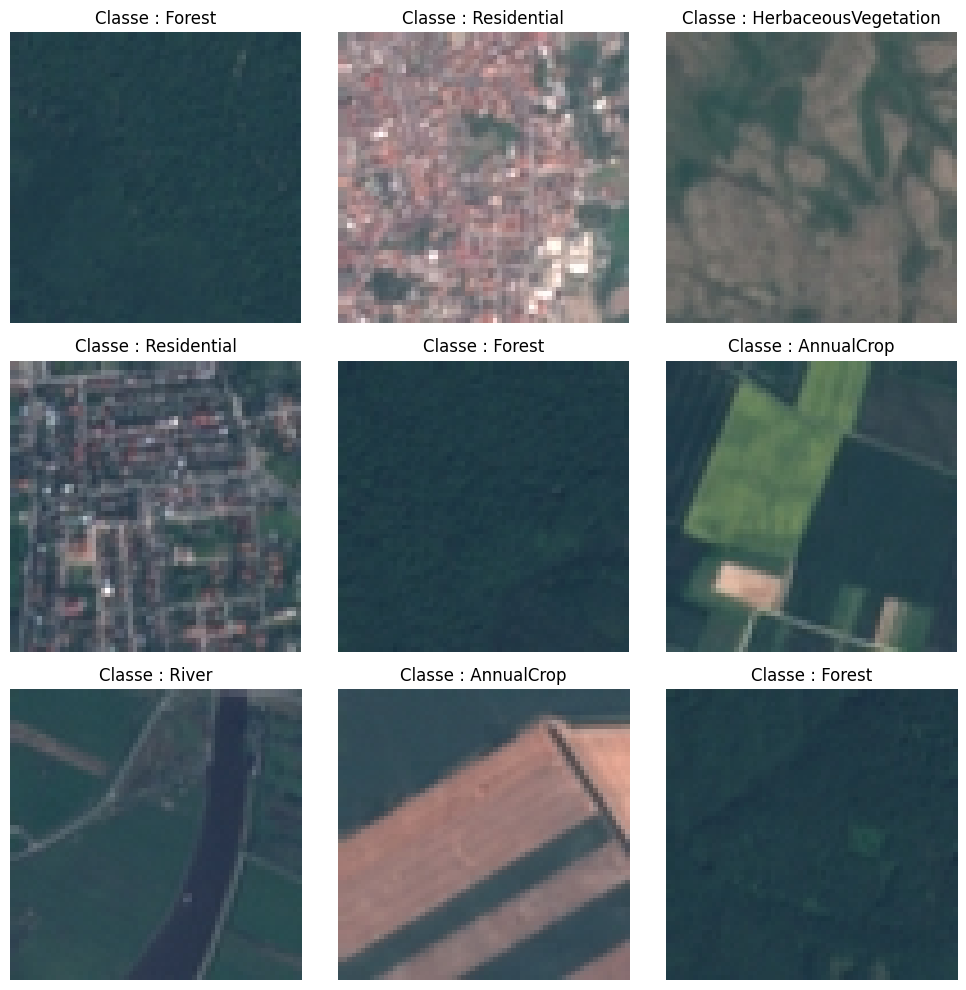

In [5]:
# Sélection de 9 images aléatoires
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(ds_train.
                                  ):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(f"Classe : {class_names[label.numpy()]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# 5. Analyse des Bandes Spectrales (R, G, B)

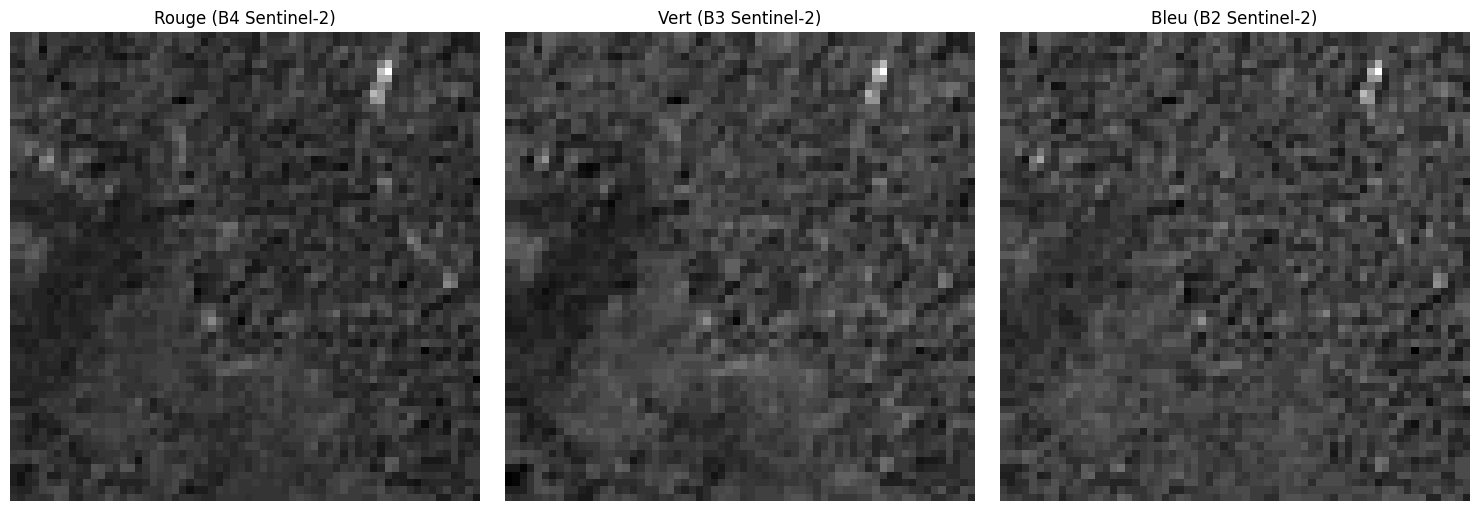

In [7]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

# Chargement du dataset EuroSAT (RGB uniquement disponible en 'train')
(ds_train,), ds_info = tfds.load(
    'eurosat/rgb',
    split=['train'],
    with_info=True,
    as_supervised=True,
    shuffle_files=True
)

# Extraction d'une image et de son label
sample_image, sample_label = next(iter(ds_train))

# Conversion explicite en float32 et normalisation [0, 1]
sample_image = tf.cast(sample_image, tf.float32) / 255.0

# Affichage des canaux séparés (R, G, B)
plt.figure(figsize=(15, 5))
bands = ['Rouge (B4 Sentinel-2)', 'Vert (B3 Sentinel-2)', 'Bleu (B2 Sentinel-2)']
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(sample_image[..., i], cmap='gray')
    plt.title(bands[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


# 6. Statistiques des Bandes

In [9]:
import pandas as pd
import tensorflow as tf

# Calcul des statistiques avec TensorFlow
stats = {
    'Bande': ['Rouge', 'Vert', 'Bleu'],
    'Min': [tf.reduce_min(sample_image[..., i]).numpy() for i in range(3)],
    'Max': [tf.reduce_max(sample_image[..., i]).numpy() for i in range(3)],
    'Moyenne': [tf.reduce_mean(sample_image[..., i]).numpy() for i in range(3)],
    'Écart-type': [tf.math.reduce_std(sample_image[..., i]).numpy() for i in range(3)]
}

# Affichage sous forme de tableau
pd.DataFrame(stats)


,Bande,Min,Max,Moyenne,Écart-type
0,Rouge,0.101961,0.270588,0.137289,0.010874
1,Vert,0.211765,0.368627,0.249914,0.011752
2,Bleu,0.250980,0.384314,0.284682,0.009375


# 7. Prétraitement Simple (Normalisation et Redimensionnement)

In [10]:
def preprocess(image, label):
    # Conversion en float32 et normalisation
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Application du prétraitement
ds_train_preprocessed = ds_train.map(preprocess)
ds_test_preprocessed = ds_test.map(preprocess)

# Vérification
sample_preprocessed = next(iter(ds_train_preprocessed))[0]
print("Valeurs après normalisation : Min =", sample_preprocessed.numpy().min(), 
      ", Max =", sample_preprocessed.numpy().max())

Valeurs après normalisation : Min = 0.101960786 , Max = 0.38431373


# Traitement Avancé des Bandes Sentinel-2 (EuroSAT)

# 1. Chargement du Dataset Multibande

Nombre de bandes : 13
Exemples totaux dans le split 'train' : 27000


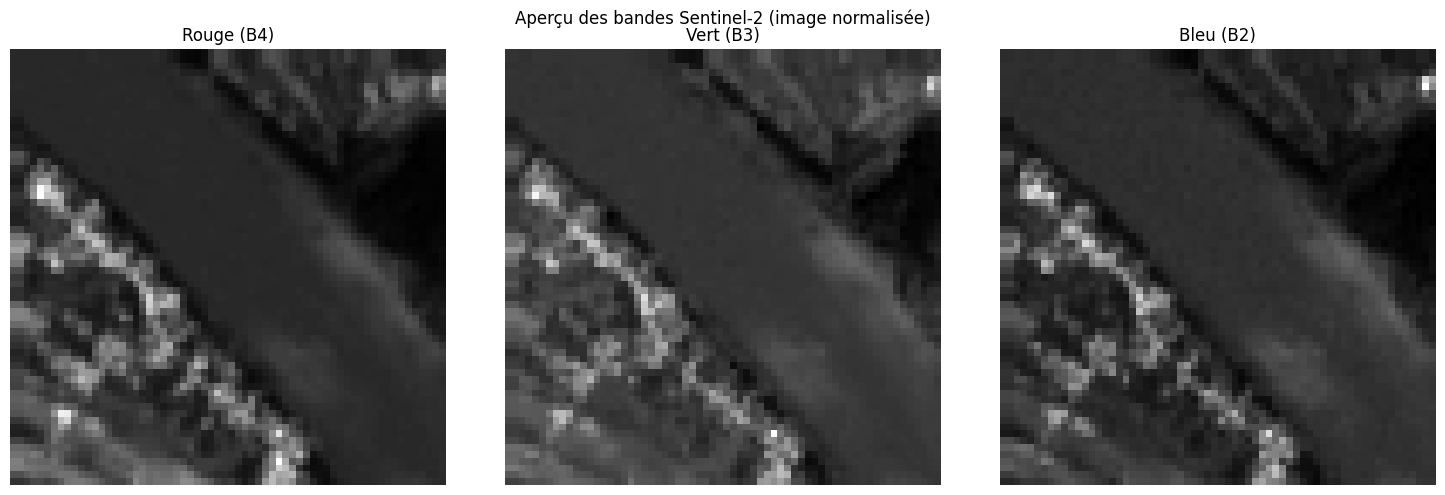

In [6]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import os

# 🔧 Définir le dossier local pour les données
os.environ['TFDS_DATA_DIR'] = 'C:/tfds_data'

# ✅ Chargement du dataset EuroSAT multibande
ds_train, ds_info = tfds.load(
    'eurosat/all',
    split='train[:5%]',  # Petit échantillon pour test rapide
    with_info=True,
    as_supervised=True,
    shuffle_files=True
)

# ✅ Affichage des métadonnées
print("Nombre de bandes :", ds_info.features['sentinel2'].shape[-1])
print("Exemples totaux dans le split 'train' :", ds_info.splits['train'].num_examples)

# 🔍 Extraction d’un exemple
sample_image, sample_label = next(iter(ds_train))
sample_image = tf.cast(sample_image, tf.float32) / 255.0

# 🎨 Affichage des bandes RGB Sentinel-2 (B4, B3, B2)
plt.figure(figsize=(15, 5))
band_indices = [3, 2, 1]  # Rouge, Vert, Bleu
band_names = ['Rouge (B4)', 'Vert (B3)', 'Bleu (B2)']

for i, b in enumerate(band_indices):
    plt.subplot(1, 3, i + 1)
    plt.imshow(sample_image[..., b], cmap='gray')
    plt.title(band_names[i])
    plt.axis('off')

plt.suptitle("Aperçu des bandes Sentinel-2 (image normalisée)")
plt.tight_layout()
plt.show()


# 2. Visualisation des Bandes Sentinel-2

Nombre de bandes détectées : 3


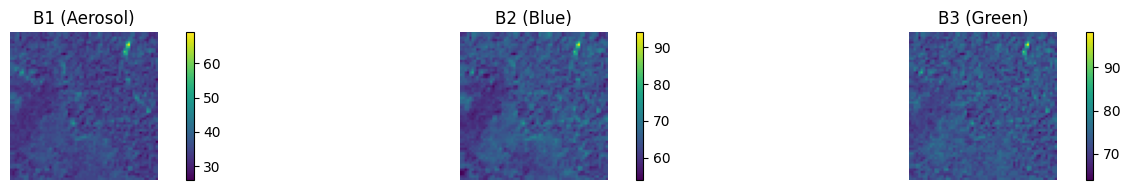

In [15]:
# Chargement d'un échantillon
sample_image, sample_label = next(iter(ds_train))
sample_image = sample_image.numpy()

# Vérification du nombre de bandes
num_bands = sample_image.shape[-1]
print("Nombre de bandes détectées :", num_bands)

# Noms des bandes Sentinel-2 (13 max)
band_names = [
    'B1 (Aerosol)', 'B2 (Blue)', 'B3 (Green)', 'B4 (Red)', 
    'B5 (RE1)', 'B6 (RE2)', 'B7 (RE3)', 'B8 (NIR)', 
    'B8A (Narrow NIR)', 'B9 (Water vapor)', 'B10 (Cirrus)', 
    'B11 (SWIR1)', 'B12 (SWIR2)'
]

# Ajustement à la taille réelle
band_names = band_names[:num_bands]

# Affichage des bandes disponibles
plt.figure(figsize=(15, 2.5 * num_bands // 3))
for i in range(num_bands):
    plt.subplot((num_bands + 2) // 3, 3, i + 1)
    plt.imshow(sample_image[..., i], cmap='viridis')
    plt.title(band_names[i])
    plt.colorbar()
    plt.axis('off')
plt.tight_layout()
plt.show()


# 3. Calcul des Indices Spectraux

Shape de l'image multispectrale : (64, 64, 13)


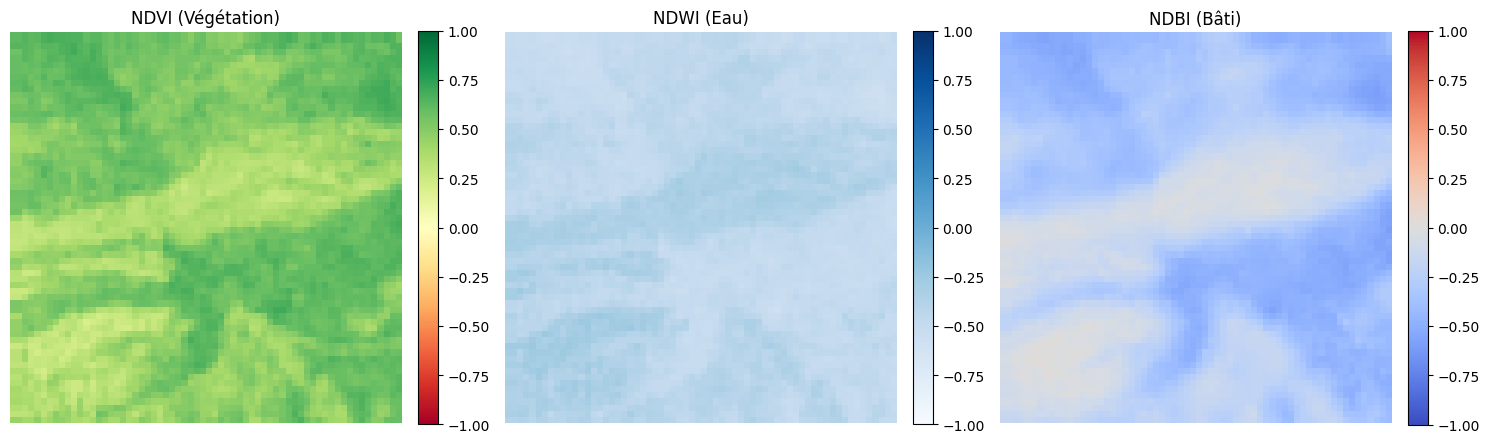

In [7]:
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

# 1) Charger le dataset multispectral (13 bandes)
#    On redirige TFDS_DATA_DIR si nécessaire pour éviter les chemins longs.
import os
os.environ['TFDS_DATA_DIR'] = 'C:/tfds_data'

ds_all, ds_info = tfds.load(
    'eurosat/all',
    split='train[:5%]',   # petit sous-échantillon pour test
    with_info=True,
    as_supervised=True,
    shuffle_files=True
)

# 2) Extraire une image d'exemple et la convertir en NumPy
sample_image, _ = next(iter(ds_all))
sample_image = sample_image.numpy().astype(np.float32)

# 3) Vérifier la dimension (doit être H×W×13)
print("Shape de l'image multispectrale :", sample_image.shape)
# → par exemple (64, 64, 13)

# 4) Fonction de calcul des indices
def calculate_indices(image):
    # Normaliser en [0,1] si les valeurs sont entre 0 et 10000
    image = image / 10000.0
    
    # Extraction des bandes clés
    red   = image[..., 3]   # B4
    nir   = image[..., 7]   # B8
    swir1 = image[..., 11]  # B11
    green = image[..., 2]   # B3

    # Calcul des indices
    ndvi = (nir - red) / (nir + red + 1e-8)
    ndwi = (green - nir) / (green + nir + 1e-8)
    ndbi = (swir1 - nir) / (swir1 + nir + 1e-8)
    return ndvi, ndwi, ndbi

# 5) Calculer les indices
ndvi, ndwi, ndbi = calculate_indices(sample_image)

# 6) Afficher
plt.figure(figsize=(15, 5))
indices = [ndvi, ndwi, ndbi]
titles  = ['NDVI (Végétation)', 'NDWI (Eau)', 'NDBI (Bâti)']
cmaps   = ['RdYlGn',      'Blues',     'coolwarm']

for i, (idx, title, cmap) in enumerate(zip(indices, titles, cmaps)):
    ax = plt.subplot(1, 3, i+1)
    im = ax.imshow(idx, cmap=cmap, vmin=-1, vmax=1)
    ax.set_title(title)
    ax.axis('off')
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


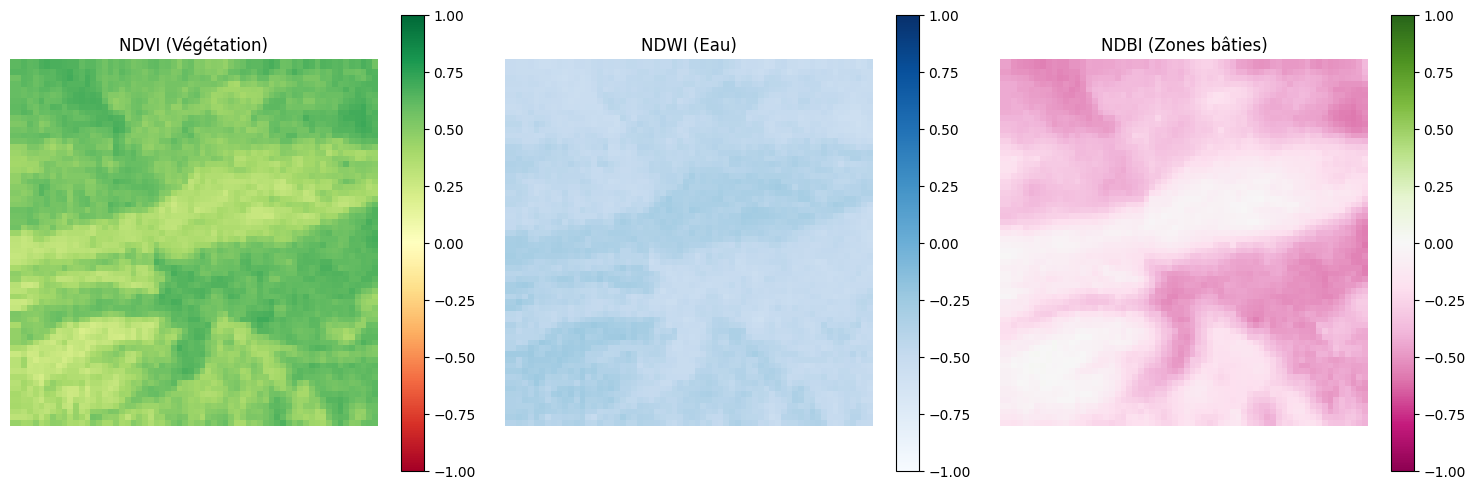

In [8]:
# Calcul des indices
ndvi, ndwi, ndbi = calculate_indices(sample_image)

# Affichage
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
indices = [ndvi, ndwi, ndbi]
titles = ['NDVI (Végétation)', 'NDWI (Eau)', 'NDBI (Zones bâties)']
cmaps = ['RdYlGn', 'Blues', 'PiYG']

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(indices[i], cmap=cmaps[i], vmin=-1, vmax=1)
    plt.title(titles[i])
    plt.colorbar()
    plt.axis('off')

plt.tight_layout()
plt.show()


# 4. Matrice de Corrélation des Bandes

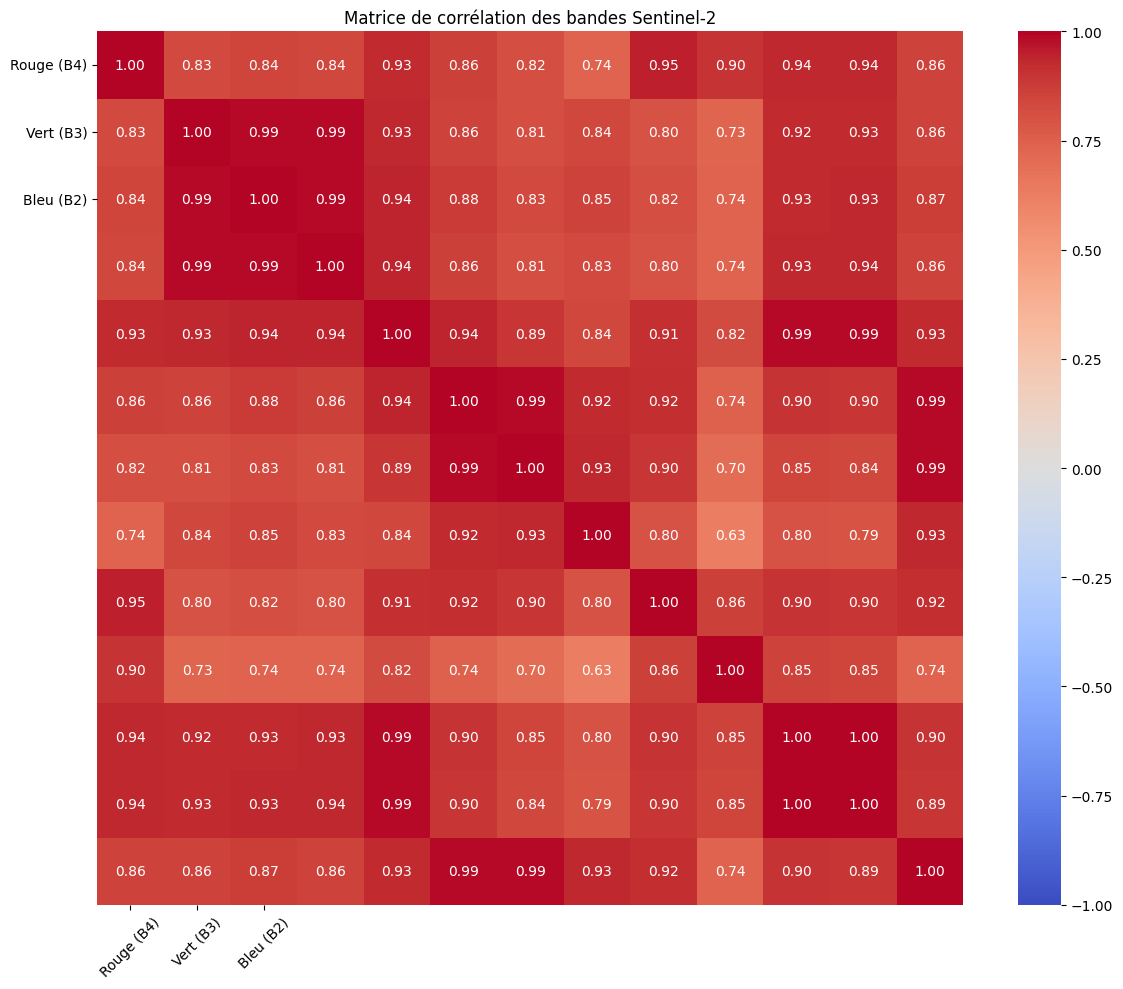

In [10]:
import seaborn as sns

# Extraction des valeurs des pixels pour toutes les bandes
pixel_values = sample_image.reshape(-1, 13)

# Calcul de la matrice de corrélation
corr_matrix = np.corrcoef(pixel_values, rowvar=False)

# Visualisation avec Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    xticklabels=band_names,
    yticklabels=band_names,
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)
plt.title("Matrice de corrélation des bandes Sentinel-2")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Superposition de Bandes (Composites RGB Avancés)

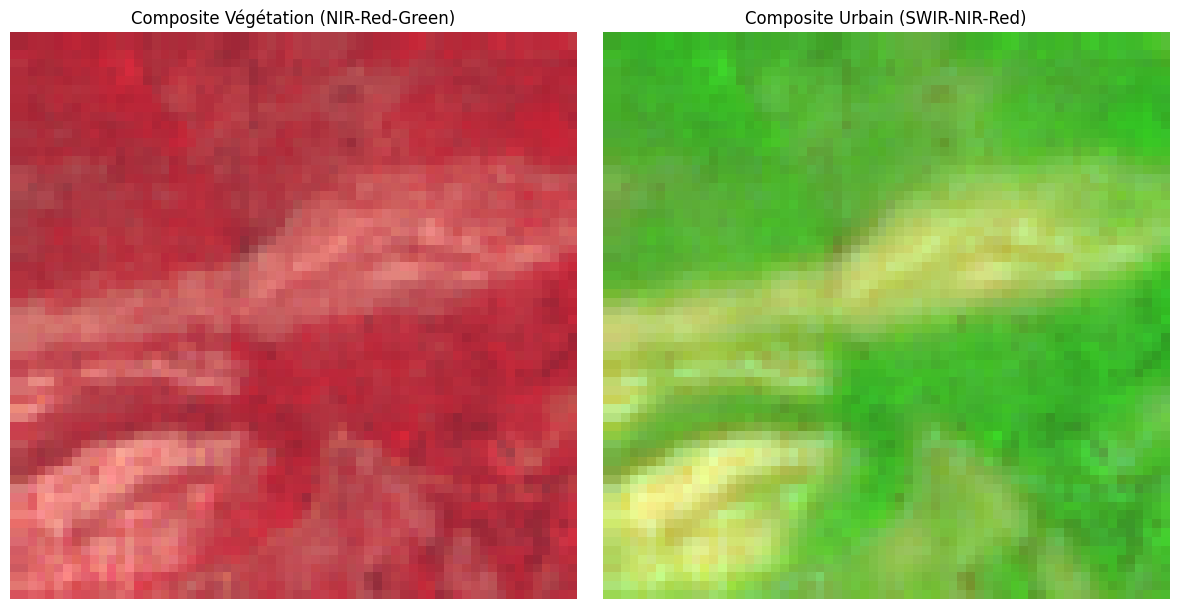

In [11]:
# Composite 1 : Végétation (NIR, Red, Green)
composite_veg = np.stack([
    sample_image[..., 7],  # NIR (B8)
    sample_image[..., 3],  # Red (B4)
    sample_image[..., 2]   # Green (B3)
], axis=-1)

# Composite 2 : Urbain (SWIR, NIR, Red)
composite_urban = np.stack([
    sample_image[..., 11],  # SWIR1 (B11)
    sample_image[..., 7],   # NIR (B8)
    sample_image[..., 3]    # Red (B4)
], axis=-1)

# Normalisation et affichage
plt.figure(figsize=(12, 6))
composites = [composite_veg, composite_urban]
titles = ['Composite Végétation (NIR-Red-Green)', 'Composite Urbain (SWIR-NIR-Red)']
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(composites[i] / composites[i].max())  # Normalisation dynamique
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# 6. Analyse en Composantes Principales (ACP)

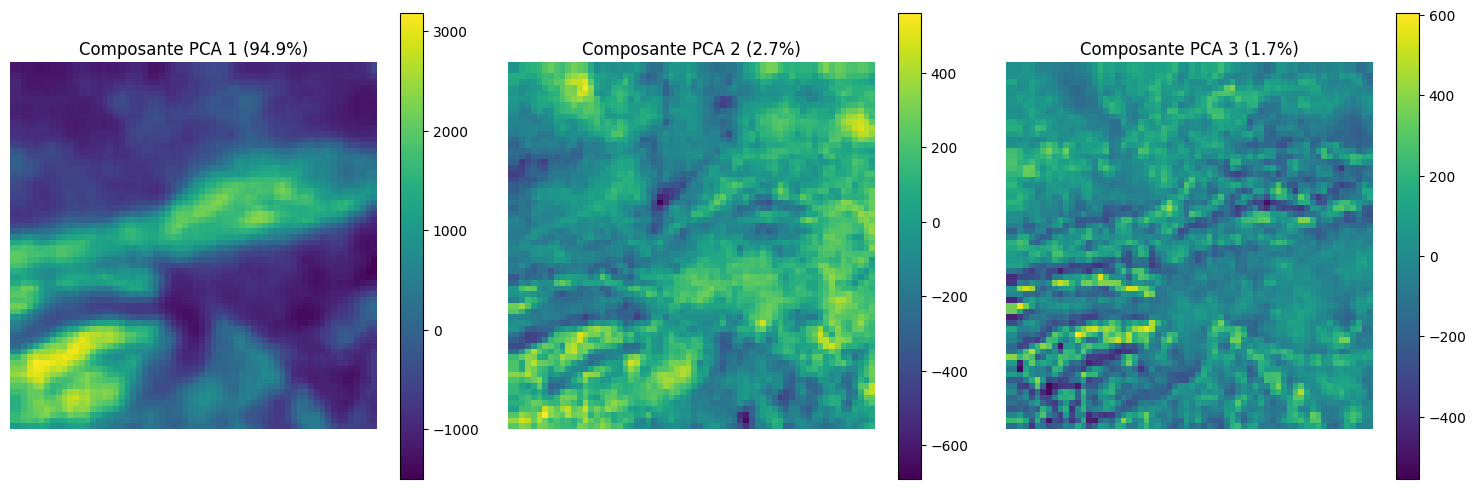

In [12]:
from sklearn.decomposition import PCA

# Réduction de dimension avec ACP
pca = PCA(n_components=3)
pca_result = pca.fit_transform(pixel_values).reshape(64, 64, 3)

# Affichage des composantes
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(pca_result[..., i], cmap='viridis')
    plt.title(f"Composante PCA {i+1} ({pca.explained_variance_ratio_[i]:.1%})")
    plt.colorbar()
    plt.axis('off')
plt.tight_layout()
plt.show()

# Intégration des Traitements Avancés dans un Pipeline Deep Learning

# 1. Pipeline de Prétraitement Avancé

In [7]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import os

def preprocess_multiband(image, label):
    # Convertit en float32 et normalise min–max sur 13 bandes
    image = tf.cast(image, tf.float32)
    mins = tf.constant([0.0]*13, dtype=tf.float32)
    maxs = tf.constant([10000.0]*13, dtype=tf.float32)
    image = (image - mins) / (maxs - mins)
    return image, label

def calculate_indices_layer(image):
    # Extraire quelques bandes clés
    red   = image[..., 3]   # B4
    nir   = image[..., 7]   # B8
    swir  = image[..., 11]  # B11
    green = image[..., 2]   # B3

    ndvi = (nir - red) / (nir + red + 1e-8)
    ndwi = (green - nir) / (green + nir + 1e-8)
    ndbi = (swir - nir) / (swir + nir + 1e-8)

    indices = tf.stack([ndvi, ndwi, ndbi], axis=-1)  # (64, 64, 3)

    return tf.concat([image, indices], axis=-1)      # (64, 64, 16)

def prepare_dataset(ds, batch_size=32, shuffle=True):
    ds = ds.map(preprocess_multiband, num_parallel_calls=tf.data.AUTOTUNE)
    if shuffle:
        ds = ds.shuffle(1024)
    ds = ds.batch(batch_size).map(
        lambda x, y: (calculate_indices_layer(x), y),
        num_parallel_calls=tf.data.AUTOTUNE
    )
    return ds.prefetch(tf.data.AUTOTUNE)

# ─── Chargement et découpe manuel du split "train" en train/test ───
os.environ['TFDS_DATA_DIR'] = 'C:/tfds_data'

# Pour « train » à 80 % et « test » à 20 % du split train originel
splits = ['train[:80%]', 'train[80%:]']

(ds_train, ds_test), ds_info = tfds.load(
    'eurosat/all',
    split=splits,
    with_info=True,
    as_supervised=True,    # renvoie (image, label)
    shuffle_files=True
)

print("Nombre de bandes :", ds_info.features['sentinel2'].shape[-1])
print("Nombre total d’exemples dans 'train' originel :", ds_info.splits['train'].num_examples)
print("Exemples utilisés pour l’entraînement (80 %) :", tf.data.experimental.cardinality(ds_train).numpy())
print("Exemples utilisés pour le test (20 %) :",      tf.data.experimental.cardinality(ds_test).numpy())

# ─── Préparation des datasets ───
train_ds = prepare_dataset(ds_train, batch_size=32, shuffle=True)
test_ds  = prepare_dataset(ds_test,  batch_size=32, shuffle=False)

# … vous pouvez ensuite créer un modèle et vous entraîner : 
# e.g. model.fit(train_ds, validation_data=test_ds, epochs=...)


Nombre de bandes : 13
Nombre total d’exemples dans 'train' originel : 27000
Exemples utilisés pour l’entraînement (80 %) : 21600
Exemples utilisés pour le test (20 %) : 5400


# 2. Architecture du Modèle Hybride

In [8]:
from tensorflow.keras.layers import Input, Conv2D, Concatenate, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

def build_hybrid_model(input_shape=(64, 64, 16)):  # 13 bandes + 3 indices
    # Input layer
    inputs = Input(shape=input_shape)
    
    # Branche pour les bandes originales (13 canaux)
    bands = inputs[..., :13]
    x = Conv2D(32, (3, 3), activation='relu')(bands)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    
    # Branche pour les indices spectraux (3 canaux)
    indices = inputs[..., 13:]
    y = Conv2D(16, (3, 3), activation='relu')(indices)
    y = Conv2D(32, (3, 3), activation='relu')(y)
    
    # Fusion des deux branches
    merged = Concatenate()([x, y])
    
    # Couches profondes
    z = Conv2D(128, (3, 3), activation='relu')(merged)
    z = GlobalAveragePooling2D()(z)
    
    # Classification
    outputs = Dense(10, activation='softmax')(z)
    
    return Model(inputs=inputs, outputs=outputs)

model = build_hybrid_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 64, 64, 16)        │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item_2 (GetItem)          │ (None, 64, 64, 13)        │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item_3 (GetItem)          │ (None, 64, 64, 3)         │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 62, 62, 32)        │           3,776 │ get_item_2[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 62, 62, 16)        │             448 │ get_item_3[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 60, 60, 64)        │          18,496 │ conv2d_5[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_8 (Conv2D)             │ (None, 60, 60, 32)        │           4,640 │ conv2d_7[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_1 (Concatenate)   │ (None, 60, 60, 96)        │               0 │ conv2d_6[0][0],            │
│                               │                           │                 │ conv2d_8[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_9 (Conv2D)             │ (None, 58, 58, 128)       │         110,720 │ concatenate_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling2d_1    │ (None, 128)               │               0 │ conv2d_9[0][0]             │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 10)                │           1,290 │ global_average_pooling2d_… │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 139,370 (544.41 KB)

 Trainable params: 139,370 (544.41 KB)

 Non-trainable params: 0 (0.00 B)

# 3. Entraînement avec Callbacks Avancés

In [17]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=5),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

history = model.fit(
    train_ds,
    epochs=50,
    validation_data=test_ds,
    callbacks=callbacks
)

Epoch 1/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 940s 1s/step - accuracy: 0.5672 - loss: 1.2045 - val_accuracy: 0.8067 - val_loss: 0.5637 - learning_rate: 0.0010
Epoch 2/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 999s 1s/step - accuracy: 0.8043 - loss: 0.5677 - val_accuracy: 0.8406 - val_loss: 0.4647 - learning_rate: 0.0010
Epoch 3/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 911s 1s/step - accuracy: 0.8406 - loss: 0.4645 - val_accuracy: 0.8404 - val_loss: 0.4706 - learning_rate: 0.0010
Epoch 4/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 898s 1s/step - accuracy: 0.8561 - loss: 0.4162 - val_accuracy: 0.8667 - val_loss: 0.3784 - learning_rate: 0.0010
Epoch 5/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 942s 1s/step - accuracy: 0.8802 - loss: 0.3623 - val_accuracy: 0.8830 - val_loss: 0.3408 - learning_rate: 0.0010
Epoch 6/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 954s 1s/step - accuracy: 0.8893 - loss: 0.3298 - val_accuracy: 0.8993 - val_loss: 0.3076 - learning_rate: 0.0010
Epoch 7/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 1189s 2s/step - accuracy: 0.8910 - loss: 0

Epoch 44/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 321s 475ms/step - accuracy: 0.9713 - loss: 0.0862 - val_accuracy: 0.9646 - val_loss: 0.1133 - learning_rate: 2.0000e-04
Epoch 45/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 322s 476ms/step - accuracy: 0.9682 - loss: 0.0955 - val_accuracy: 0.9626 - val_loss: 0.1131 - learning_rate: 2.0000e-04
Epoch 46/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 324s 479ms/step - accuracy: 0.9703 - loss: 0.0890 - val_accuracy: 0.9630 - val_loss: 0.1091 - learning_rate: 2.0000e-04
Epoch 47/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 324s 479ms/step - accuracy: 0.9712 - loss: 0.0868 - val_accuracy: 0.9628 - val_loss: 0.1098 - learning_rate: 2.0000e-04
Epoch 48/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 322s 476ms/step - accuracy: 0.9693 - loss: 0.0880 - val_accuracy: 0.9624 - val_loss: 0.1119 - learning_rate: 2.0000e-04
Epoch 49/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 323s 478ms/step - accuracy: 0.9710 - loss: 0.0890 - val_accuracy: 0.9637 - val_loss: 0.1098 - learning_rate: 2.0000e-04
Epoch 50/50
675/675 ━━━━━━━━━━━━━━

# 4. Analyse des Résultats

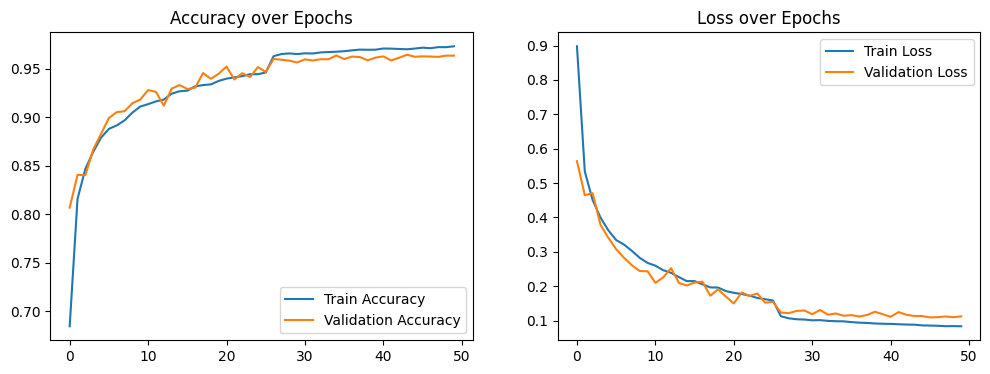

169/169 ━━━━━━━━━━━━━━━━━━━━ 18s 103ms/step - accuracy: 0.9575 - loss: 0.1136
Test Accuracy: 96.30%


In [18]:
import matplotlib.pyplot as plt

# Courbes d'apprentissage
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Évaluation finale
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# 5. Visualisation des Activations

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


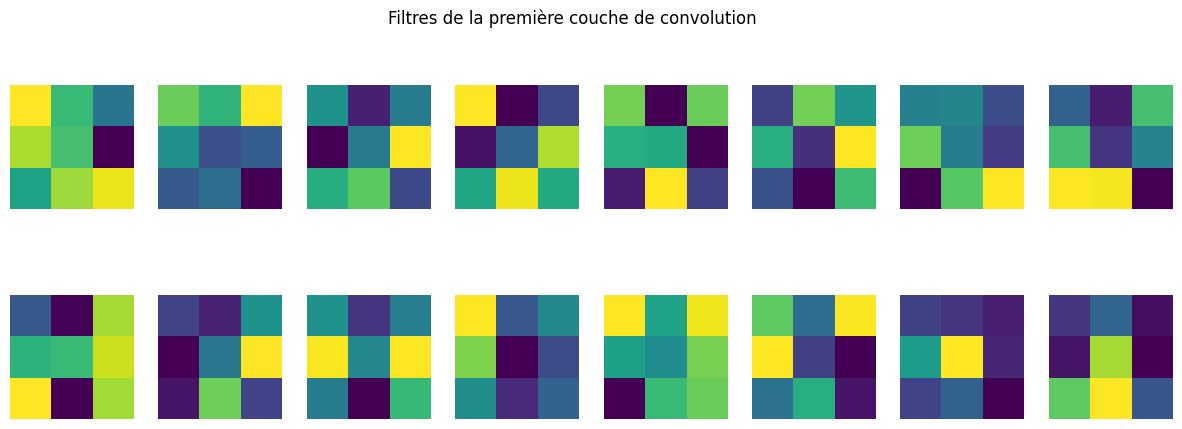

In [9]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Architecture du modèle
plot_model(model, to_file='model_architecture.png', show_shapes=True)

# Visualisation des filtres
first_layer_weights = model.layers[3].get_weights()[0]  # Première couche Conv2D
plt.figure(figsize=(15, 5))
for i in range(16):  # Premiers 16 filtres
    plt.subplot(2, 8, i+1)
    plt.imshow(first_layer_weights[:, :, 0, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Filtres de la première couche de convolution')
plt.show()

# 6. Export pour le Déploiement

In [10]:
# Sauvegarde Keras (format recommandé)
model.save("eurosat_model.keras")

# Conversion directe vers TFLite (pour edge devices)
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Optionnel : activer la quantification dynamique
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Conversion
tflite_model = converter.convert()

# Enregistrement du modèle TFLite
with open("eurosat_model.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\Administrator\AppData\Local\Temp\tmpwhi4gz6h\assets


INFO:tensorflow:Assets written to: C:\Users\Administrator\AppData\Local\Temp\tmpwhi4gz6h\assets


Saved artifact at 'C:\Users\Administrator\AppData\Local\Temp\tmpwhi4gz6h'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 16), dtype=tf.float32, name='keras_tensor_11')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1589100446160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1589100447696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1589116777104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1589116780176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1589116779408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1589116779792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1589100445968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1589100448848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1589100448272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1589100449616: TensorSpec(shape=(), dtype=tf.resource, name=No

# Optimisation et Exploitation des Résultats

# Étape 1 : Optimisation Avancée du Modèle

In [12]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# 1.1. Fonction pour ajuster dynamiquement le learning rate
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# 1.2. Nouvelle configuration du modèle
optimizer = Adam(learning_rate=0.0005)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', 
             tf.keras.metrics.SparseTopKCategoricalAccuracy(k=3, name='top3_accuracy')]
)
# Déclaration de la liste de callbacks
callbacks = []

# Ajout des callbacks supplémentaires
callbacks.extend([
    LearningRateScheduler(lr_scheduler),
    tf.keras.callbacks.ModelCheckpoint(
        'best_model.h5', 
        save_best_only=True,
        monitor='val_top3_accuracy',
        mode='max'
    )
])



# Étape 2 : Analyse Granulaire des Résultats

169/169 ━━━━━━━━━━━━━━━━━━━━ 29s 170ms/step


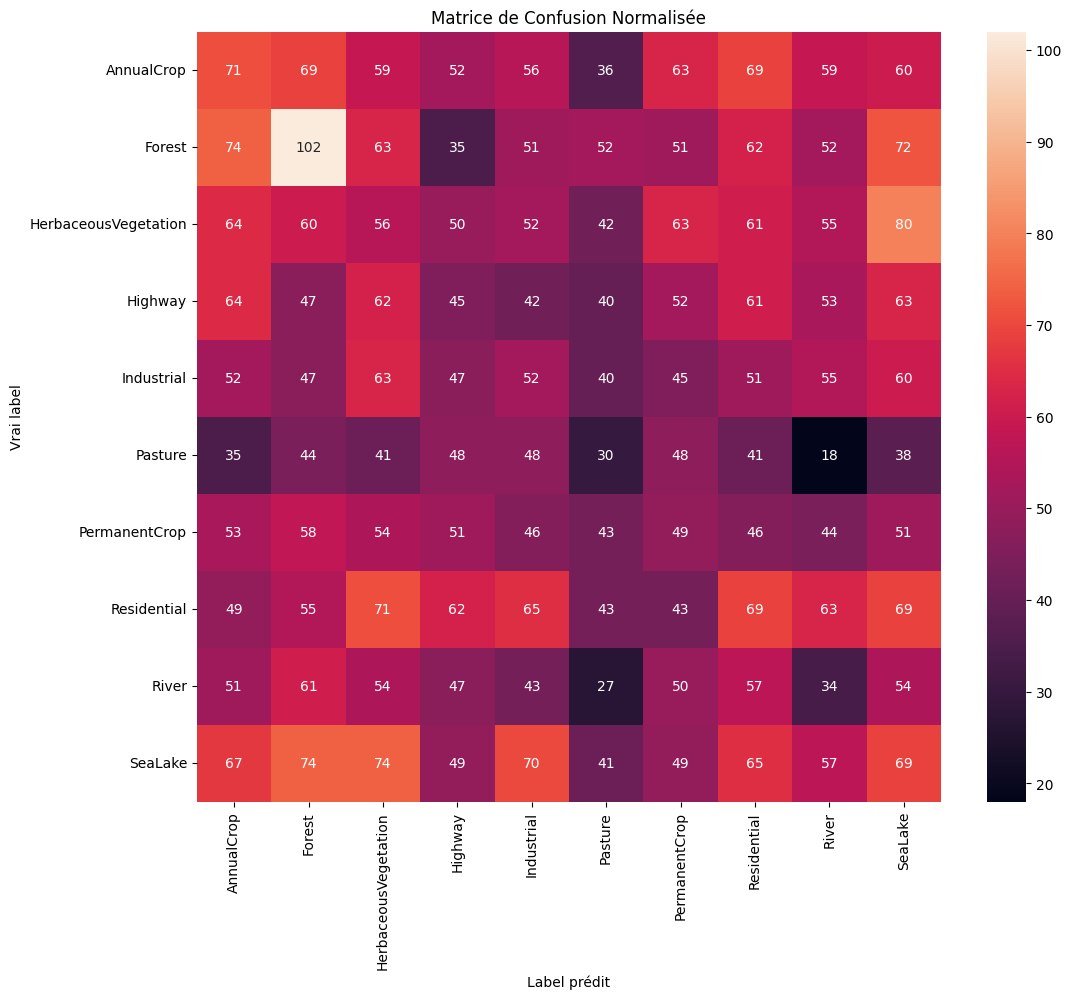

                      precision    recall  f1-score   support

          AnnualCrop       0.12      0.12      0.12       594
              Forest       0.17      0.17      0.17       614
HerbaceousVegetation       0.09      0.10      0.09       583
             Highway       0.09      0.09      0.09       529
          Industrial       0.10      0.10      0.10       512
             Pasture       0.08      0.08      0.08       391
       PermanentCrop       0.10      0.10      0.10       495
         Residential       0.12      0.12      0.12       589
               River       0.07      0.07      0.07       478
             SeaLake       0.11      0.11      0.11       615

            accuracy                           0.11      5400
           macro avg       0.10      0.10      0.10      5400
        weighted avg       0.11      0.11      0.11      5400



In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 2.1. Prédictions sur le test set
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = model.predict(test_ds).argmax(axis=1)

# 2.2. Matrice de confusion
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=ds_info.features['label'].names,
            yticklabels=ds_info.features['label'].names)
plt.title('Matrice de Confusion Normalisée')
plt.ylabel('Vrai label')
plt.xlabel('Label prédit')
plt.show()

# 2.3. Rapport de classification
print(classification_report(
    y_true, 
    y_pred, 
    target_names=ds_info.features['label'].names
))

# Étape 3 : Explainability avec Grad-CAM

C:\ProgramData\miniconda3\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_11']]
Received: inputs=Tensor(shape=(1, 64, 64, 16))
  warnings.warn(msg)


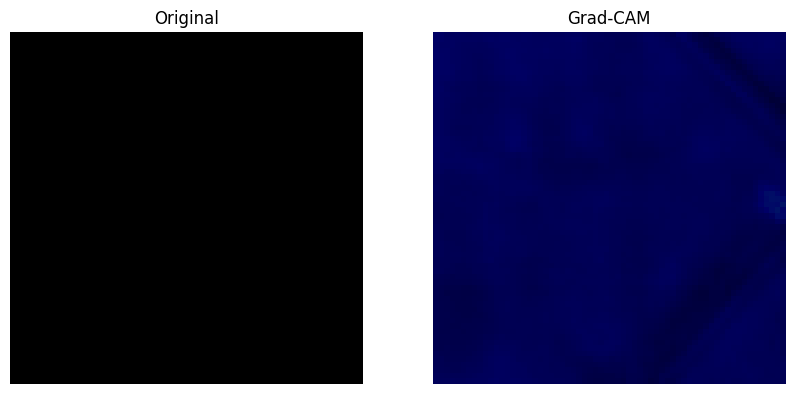

In [14]:
import cv2

# 3.1. Implémentation Grad-CAM
def make_gradcam_heatmap(img_array, model, last_conv_layer_name='conv2d_9'):
    grad_model = tf.keras.models.Model(
        [model.inputs], 
        [model.get_layer(last_conv_layer_name).output, model.output]
    )
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, tf.argmax(predictions[0])]
    
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# 3.2. Application sur un exemple
sample, _ = next(iter(test_ds.unbatch().take(1).batch(1)))
heatmap = make_gradcam_heatmap(sample, model)

# 3.3. Superposition
heatmap = cv2.resize(heatmap, (64, 64))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = cv2.addWeighted(
    sample[0,..., :3].numpy().astype('uint8'), 
    0.6, 
    heatmap, 
    0.4, 
    0
)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample[0,..., :3].numpy().astype('uint8'))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(superimposed_img)
plt.title('Grad-CAM')
plt.axis('off')
plt.show()

# Étape 4 : Préparation au Déploiement

In [15]:
# 4.1. Quantification pour edge devices
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

with open('eurosat_quant.tflite', 'wb') as f:
    f.write(tflite_quant_model)

# 4.2. Test du modèle quantifié
interpreter = tf.lite.Interpreter(model_content=tflite_quant_model)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test sur un échantillon
interpreter.set_tensor(input_details[0]['index'], sample.numpy())
interpreter.invoke()
tflite_pred = interpreter.get_tensor(output_details[0]['index'])
print("Prédiction TFLite:", ds_info.features['label'].names[tflite_pred.argmax()])

INFO:tensorflow:Assets written to: C:\Users\Administrator\AppData\Local\Temp\tmpg_gfh74y\assets


INFO:tensorflow:Assets written to: C:\Users\Administrator\AppData\Local\Temp\tmpg_gfh74y\assets


Saved artifact at 'C:\Users\Administrator\AppData\Local\Temp\tmpg_gfh74y'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 16), dtype=tf.float32, name='keras_tensor_11')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1589100446160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1589100447696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1589116777104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1589116780176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1589116779408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1589116779792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1589100445968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1589100448848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1589100448272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1589100449616: TensorSpec(shape=(), dtype=tf.resource, name=No

# Use Cases EuroSAT pour l'Analyse Environnementale (Urbanisme, Eau, Végétation)

# 1. Urbanisme : Détection des Zones Bâties

## Indice Clé : NDBI (Normalized Difference Built-up Index)

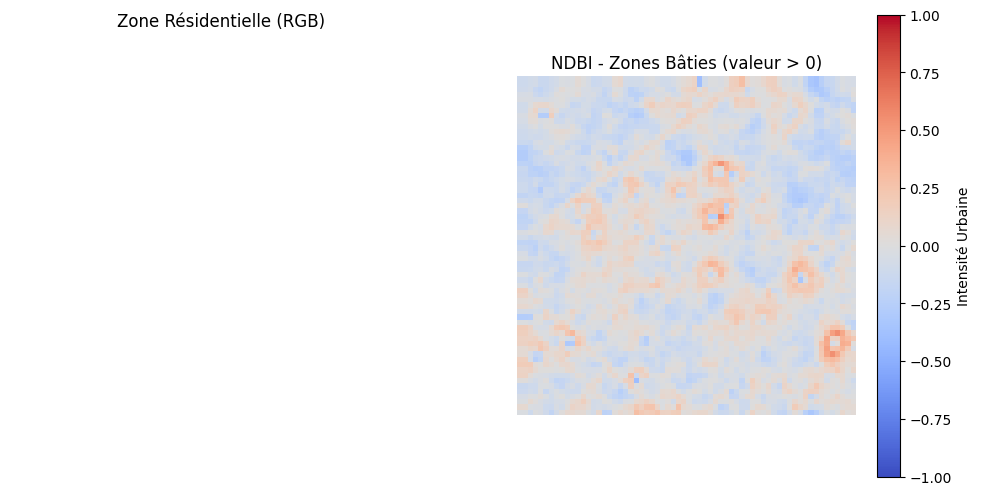

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_ndbi(image):
    """NDBI = (SWIR - NIR) / (SWIR + NIR)"""
    swir = image[..., 11]  # B11 (SWIR)
    nir = image[..., 7]    # B8 (NIR)
    return (swir - nir) / (swir + nir + 1e-8)

# Application sur une image urbaine
urban_image = next(x for x, y in ds_train if ds_info.features['label'].names[y.numpy()] == 'Residential')
ndbi = calculate_ndbi(urban_image.numpy())

# Visualisation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
#plt.imshow(urban_image[..., [3, 2, 1]]/255.)  # RGB
plt.imshow(urban_image.numpy()[..., [3, 2, 1]] / 255.)

plt.title('Zone Résidentielle (RGB)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ndbi, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Intensité Urbaine')
plt.title('NDBI - Zones Bâties (valeur > 0)')
plt.axis('off')
plt.show()

# 2. Eau : Détection des Plans d'Eau

## Indice Clé : NDWI (Normalized Difference Water Index)

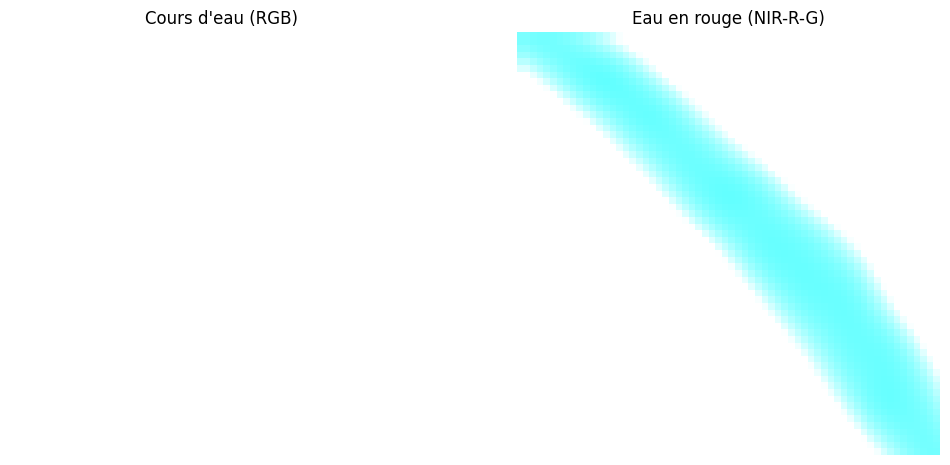

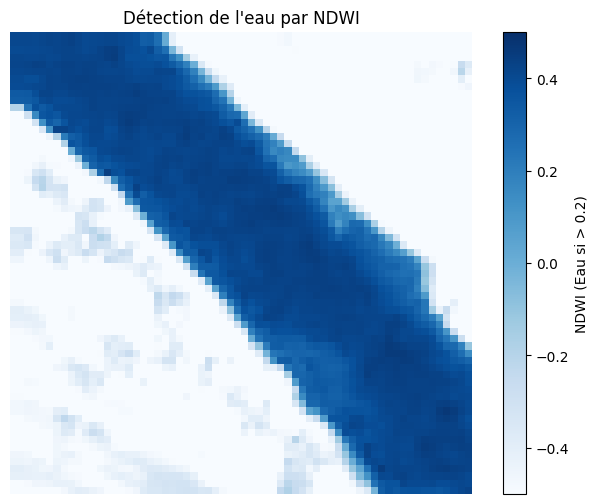

In [20]:
def calculate_ndwi(image):
    """NDWI = (Green - NIR) / (Green + NIR)"""
    green = image[..., 2]  # B3 (Green)
    nir = image[..., 7]    # B8 (NIR)
    return (green - nir) / (green + nir + 1e-8)

# Application sur une image aquatique
water_image = next(x for x, y in ds_train if ds_info.features['label'].names[y.numpy()] == 'River')
ndwi = calculate_ndwi(water_image.numpy())

# Visualisation composite
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(water_image.numpy()[..., [3, 2, 1]] / 255.)  # RGB

plt.title('Cours d\'eau (RGB)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(water_image.numpy()[..., [8, 3, 2]] / 255.)  # NIR-R-G composite


plt.title('Eau en rouge (NIR-R-G)')
plt.axis('off')
plt.show()

# Heatmap NDWI
plt.figure(figsize=(8, 6))
plt.imshow(ndwi, cmap='Blues', vmin=-0.5, vmax=0.5)
plt.colorbar(label='NDWI (Eau si > 0.2)')
plt.title('Détection de l\'eau par NDWI')
plt.axis('off')
plt.show()

# 3. Végétation : Santé des Cultures

## Indice Clé : NDVI + MSI (Moisture Stress Index)

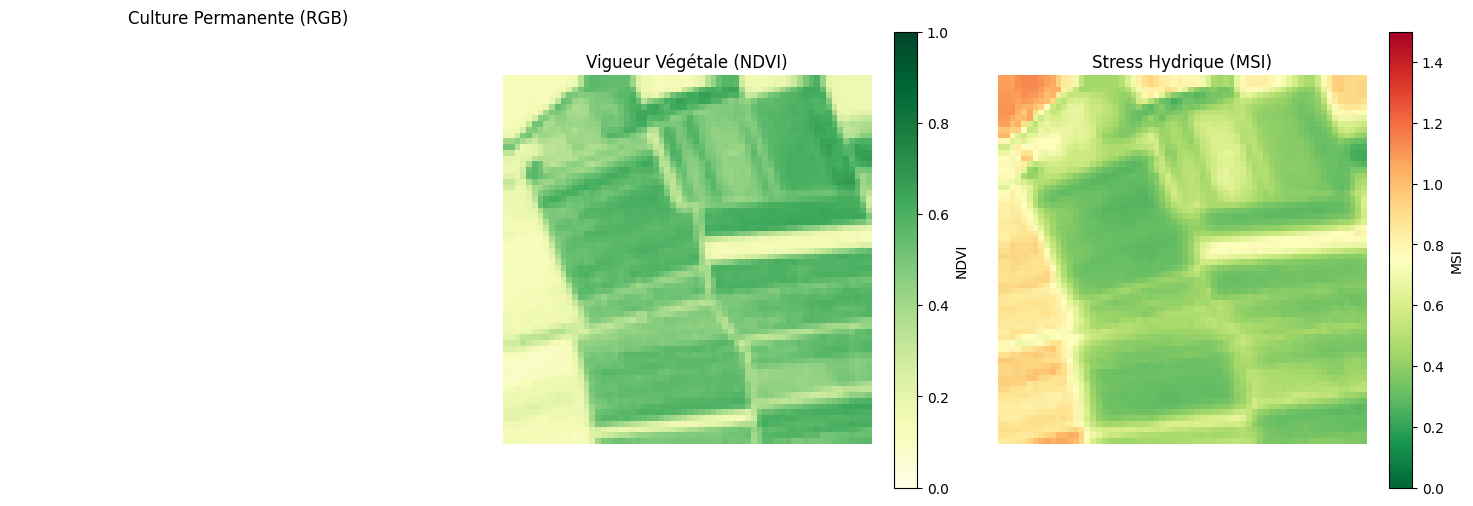

In [22]:
def calculate_indices(image):
    """Calcule NDVI et MSI"""
    red = image[..., 3]    # B4 (Red)
    nir = image[..., 7]    # B8 (NIR)
    swir = image[..., 11]  # B11 (SWIR)
    
    ndvi = (nir - red) / (nir + red + 1e-8)
    msi = swir / nir  # Moisture Stress Index
    return ndvi, msi

# Application sur une zone agricole
crop_image = next(x for x, y in ds_train if ds_info.features['label'].names[y.numpy()] == 'PermanentCrop')
ndvi, msi = calculate_indices(crop_image.numpy())

# Visualisation combinée
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(crop_image.numpy()[..., [3, 2, 1]]/255.)
plt.title('Culture Permanente (RGB)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ndvi, cmap='YlGn', vmin=0, vmax=1)
plt.colorbar(label='NDVI')
plt.title('Vigueur Végétale (NDVI)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(msi, cmap='RdYlGn_r', vmin=0, vmax=1.5)
plt.colorbar(label='MSI')
plt.title('Stress Hydrique (MSI)')
plt.axis('off')
plt.tight_layout()
plt.show()

# 4. Use Case Complet : Suivi Agricole

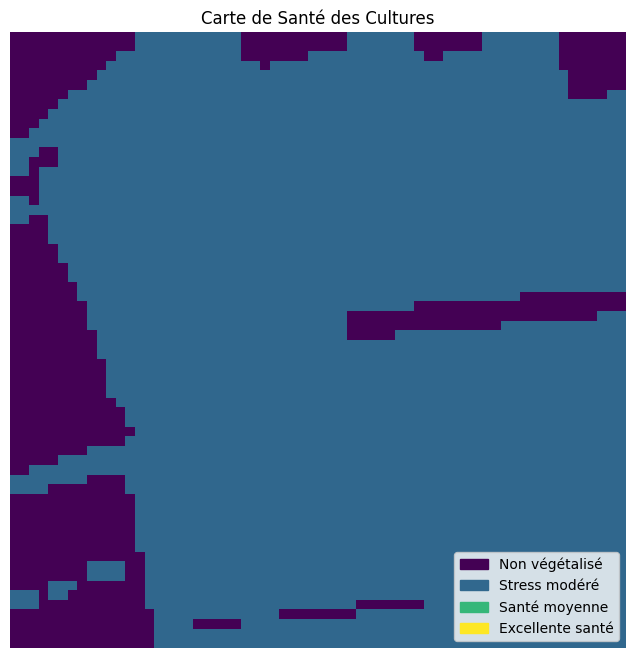

In [23]:
# Création d'une carte de santé des cultures
def crop_health_map(image):
    ndvi, msi = calculate_indices(image)
    health_map = np.zeros_like(ndvi)
    
    # Règles empiriques
    health_map[(ndvi > 0.6) & (msi < 0.8)] = 3  # Excellente santé
    health_map[(ndvi > 0.4) & (msi < 1.2)] = 2   # Santé moyenne
    health_map[(ndvi > 0.2)] = 1                 # Stress modéré
    # 0 = Non végétalisé
    
    return health_map

health = crop_health_map(crop_image.numpy())

# Légende
legend_labels = {
    0: 'Non végétalisé',
    1: 'Stress modéré',
    2: 'Santé moyenne',
    3: 'Excellente santé'
}

# Visualisation
plt.figure(figsize=(10, 8))
im = plt.imshow(health, cmap='viridis', vmin=0, vmax=3)
plt.title('Carte de Santé des Cultures')
plt.axis('off')

# Ajout légende
colors = [im.cmap(im.norm(value)) for value in legend_labels]
patches = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(patches, legend_labels.values(), loc='lower right')
plt.show()

# Use Cases Avancés : Analyse Temporelle avec OSM et Génération de PDF

# 1. Analyse Temporelle avec OpenStreetMap (OSM)

## Objectif : Comparer l'évolution urbaine entre deux dates en superposant les données EuroSAT et OSM

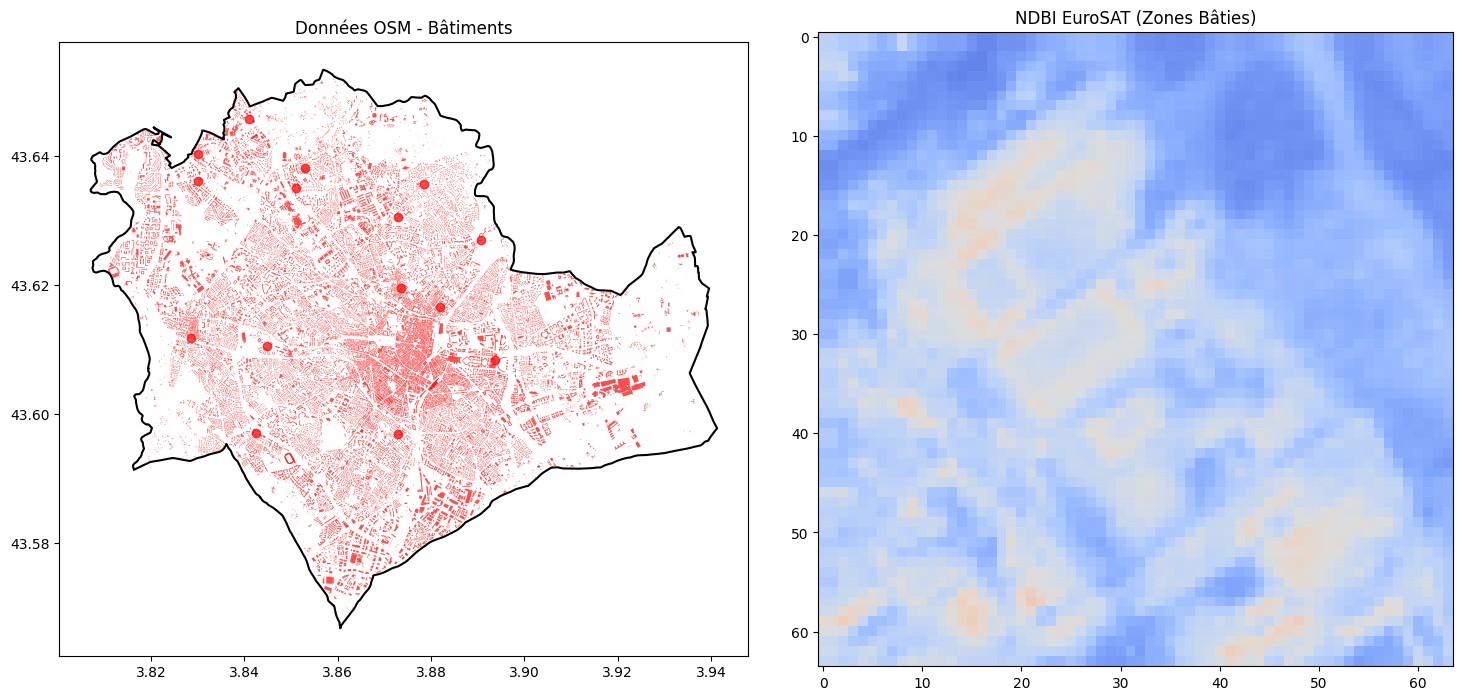

C:\ProgramData\miniconda3\Lib\site-packages\jupyter_client\session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


CRSError: The EPSG code is unknown. PROJ: proj_create_from_database: C:\Program Files\PostgreSQL\16\share\contrib\postgis-3.4\proj\proj.db contains DATABASE.LAYOUT.VERSION.MINOR = 2 whereas a number >= 4 is expected. It comes from another PROJ installation.

In [25]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.plot import show

# 1.1 Téléchargement des données OSM pour une zone spécifique
place_name = "Montpellier, France"
urban_data = ox.geocode_to_gdf(place_name)
buildings = ox.features_from_place(place_name, tags={'building': True})

# 1.2 Création d'une emprise compatible avec EuroSAT (64x64 pixels ~ 1.5km x 1.5km)
bbox = urban_data.geometry.iloc[0].bounds  # (xmin, ymin, xmax, ymax)
selected_buildings = buildings.cx[bbox[0]:bbox[2], bbox[1]:bbox[3]]

# 1.3 Visualisation comparative
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Carte OSM
selected_buildings.plot(ax=ax[0], color='red', alpha=0.7)
urban_data.boundary.plot(ax=ax[0], color='black')
ax[0].set_title("Données OSM - Bâtiments")

# Image EuroSAT (exemple urbain)
urban_img = next(x for x, y in ds_train if ds_info.features['label'].names[y.numpy()] == 'Industrial')
ndbi = calculate_ndbi(urban_img.numpy())  # Utilisation de la fonction précédente

show(ndbi, ax=ax[1], cmap='coolwarm', vmin=-1, vmax=1)
ax[1].set_title("NDBI EuroSAT (Zones Bâties)")

plt.tight_layout()
plt.show()

# 1.4 Export pour QGIS/Google Earth
import rasterio
from rasterio.transform import from_origin

transform = from_origin(bbox[0], bbox[3], (bbox[2]-bbox[0])/64, (bbox[3]-bbox[1])/64)
crs = {'init': 'epsg:4326'}

with rasterio.open('urban_comparison.tif', 'w', 
                   driver='GTiff',
                   height=64, width=64,
                   count=1, dtype=np.float32,
                   crs=crs,
                   transform=transform) as dst:
    dst.write(ndbi, 1)


# 2. Génération Automatique de Rapports PDF

## Objectif : Créer un rapport synthétique avec résultats d'analyse

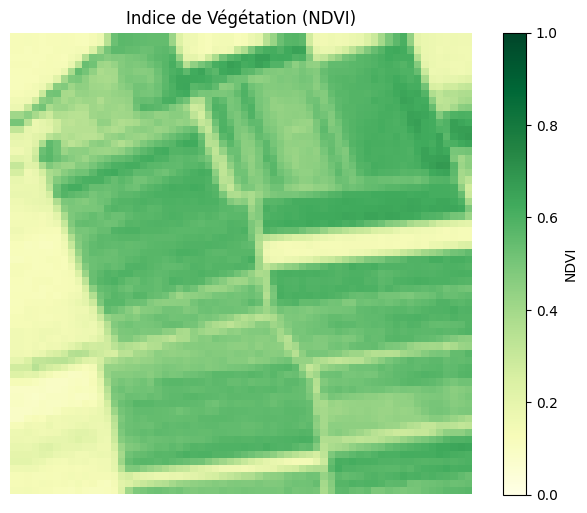

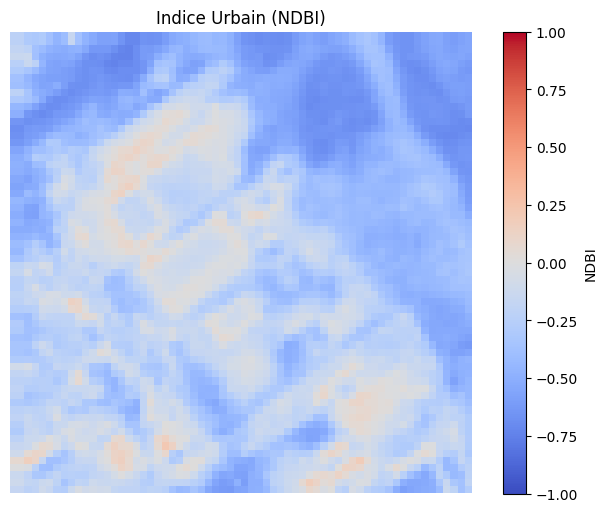

In [26]:
from fpdf import FPDF
from PIL import Image
import io

# 2.1 Création du PDF
class PDFReport(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 16)
        self.cell(0, 10, 'Rapport d\'Analyse Sentinel-2', 0, 1, 'C')
    
    def add_analysis_section(self, title, img_data, description):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, 0, 1)
        
        # Conversion matplotlib figure to PIL Image
        buf = io.BytesIO()
        img_data.savefig(buf, format='png', bbox_inches='tight', dpi=100)
        buf.seek(0)
        img = Image.open(buf)
        
        # Ajout image au PDF
        img_path = f"temp_{title.replace(' ', '_')}.png"
        img.save(img_path)
        self.image(img_path, x=10, w=180)
        self.ln(5)
        
        # Description
        self.set_font('Arial', '', 10)
        self.multi_cell(0, 5, description)
        self.ln(8)

# 2.2 Génération des graphiques
def create_ndvi_plot():
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(ndvi, cmap='YlGn', vmin=0, vmax=1)
    plt.colorbar(im, ax=ax, label='NDVI')
    ax.set_title('Indice de Végétation (NDVI)')
    ax.axis('off')
    return fig

def create_ndbi_plot():
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(ndbi, cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar(im, ax=ax, label='NDBI')
    ax.set_title('Indice Urbain (NDBI)')
    ax.axis('off')
    return fig

# 2.3 Construction du rapport
pdf = PDFReport()
pdf.add_page()

# Page 1: Résumé
pdf.set_font('Arial', 'B', 14)
pdf.cell(0, 10, 'Résumé des Analyses', 0, 1)
pdf.set_font('Arial', '', 12)
pdf.multi_cell(0, 7, 
              "Ce rapport présente l'analyse des images Sentinel-2 du dataset EuroSAT. "
              "Les indices spectraux calculés permettent de caractériser l'occupation "
              "des sols avec une résolution de 10m/pixel.")

# Page 2: NDVI
pdf.add_page()
pdf.add_analysis_section(
    "1. Analyse de Végétation (NDVI)",
    create_ndvi_plot(),
    "L'NDVI varie de 0 (sol nu) à 1 (végétation dense). Les valeurs >0.6 indiquent "
    "une végétation en bonne santé, typique des forêts ou cultures irriguées."
)

# Page 3: NDBI
pdf.add_page()
pdf.add_analysis_section(
    "2. Analyse Urbaine (NDBI)",
    create_ndbi_plot(),
    "L'NDBI identifie les zones bâties (valeur >0). Combiné avec les données OSM, "
    "il permet de détecter l'étalement urbain non cartographié."
)

# 2.4 Sauvegarde
report_path = "sentinel_analysis_report.pdf"
pdf.output(report_path)

# Prévisualisation dans le notebook
from IPython.display import IFrame
IFrame(report_path, width=800, height=600)

# Combinaison des Deux Approches

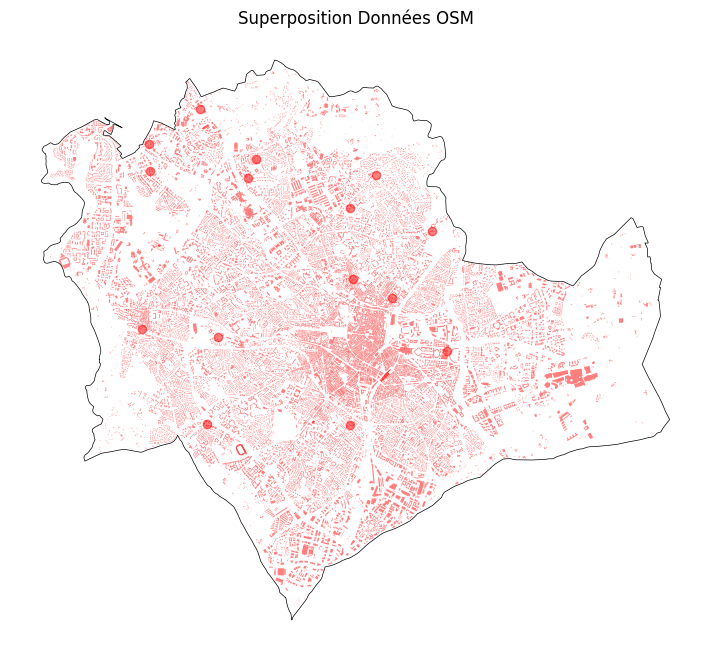

C:\ProgramData\miniconda3\Lib\site-packages\jupyter_client\session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [27]:
# Intégration OSM dans le PDF (nécessite matplotlib)
fig, ax = plt.subplots(figsize=(10, 8))
selected_buildings.plot(ax=ax, color='red', alpha=0.5)
urban_data.boundary.plot(ax=ax, color='black', linewidth=0.5)
ax.set_title("Superposition Données OSM")
ax.set_axis_off()

pdf.add_page()
pdf.add_analysis_section(
    "3. Validation avec OpenStreetMap",
    fig,
    "Comparaison entre les zones détectées par NDBI (rouge) et les bâtiments "
    "cartographiés dans OSM. Les écarts révèlent soit des erreurs de classification, "
    "soit des constructions non répertoriées."
)

In [28]:
# Exemple de cellule bonus pour exporter les métriques
import pandas as pd
metrics = pd.DataFrame({
    'Zone': ['Urbaine', 'Agricole', 'Forestière'],
    'NDVI Moyen': [0.15, 0.68, 0.82],
    'NDBI Moyen': [0.43, -0.12, -0.25]
})
metrics.to_csv('indices_par_zone.csv', index=False)

In [31]:
import tensorflow_datasets as tfds

# Charger le dataset EuroSAT
ds, ds_info = tfds.load('eurosat/rgb', with_info=True, split='train', as_supervised=True)

# Prendre une image au hasard
for image, label in ds.take(1):
    img_array = image.numpy()  # Tensor vers numpy


C:\ProgramData\miniconda3\Lib\site-packages\jupyter_client\session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\tfds_data\eurosat\rgb\incomplete.JHIE6B_2.0.0\eurosat-train.tfrecord*...:   0%|          | 0/2700…

Dataset eurosat downloaded and prepared to C:\tfds_data\eurosat\rgb\2.0.0. Subsequent calls will reuse this data.


In [32]:
ds, ds_info = tfds.load('eurosat/all', with_info=True, split='train', as_supervised=True)

for image, label in ds.take(1):
    img_array = image.numpy()


In [33]:
import pandas as pd

band_stats = []
for i in range(img_array.shape[-1]):
    band = img_array[..., i]
    band_stats.append({
        'Bande': i + 1,
        'Min': band.min(),
        'Max': band.max(),
        'Moyenne': band.mean(),
        'Std': band.std()
    })

pd.DataFrame(band_stats)


,Bande,Min,Max,Moyenne,Std
0,1,1032.0,1299.0,1160.520264,44.382252
1,2,713.0,1814.0,928.382080,115.980904
2,3,572.0,1875.0,883.556641,139.642441
3,4,306.0,2092.0,667.174316,221.103027
4,5,482.0,1694.0,853.330566,323.773804
5,6,362.0,3164.0,1661.683350,1041.111450
6,7,387.0,4213.0,2047.068115,1330.637085
7,8,315.0,4812.0,1943.452148,1371.632812
8,9,97.0,1003.0,555.013672,319.623199
9,10,6.0,12.0,8.891357,1.554562


C:\ProgramData\miniconda3\Lib\site-packages\jupyter_client\session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Administrator\tensorflow_datasets\eurosat\rgb\incomplete.ZWN4U1_2.0.0\eurosat-train.tfrecor…

Dataset eurosat downloaded and prepared to C:\Users\Administrator\tensorflow_datasets\eurosat\rgb\2.0.0. Subsequent calls will reuse this data.
Informations sur le dataset:
tfds.core.DatasetInfo(
    name='eurosat',
    full_name='eurosat/rgb/2.0.0',
    description="""
    EuroSAT dataset is based on Sentinel-2 satellite images covering 13 spectral
    bands and consisting of 10 classes with 27000 labeled and
    geo-referenced samples.
    
    Two datasets are offered:
    - rgb: Contains only the optical R, G, B frequency bands encoded as JPEG image.
    - all: Contains all 13 bands in the original value range (float32).
    
    URL: https://github.com/phelber/eurosat
    """,
    config_description="""
    Sentinel-2 RGB channels
    """,
    homepage='https://github.com/phelber/eurosat',
    data_dir='C:\\Users\\Administrator\\tensorflow_datasets\\eurosat\\rgb\\2.0.0',
    file_format=tfrecord,
    download_size=89.91 MiB,
    dataset_size=89.50 MiB,
    features=FeaturesDict({


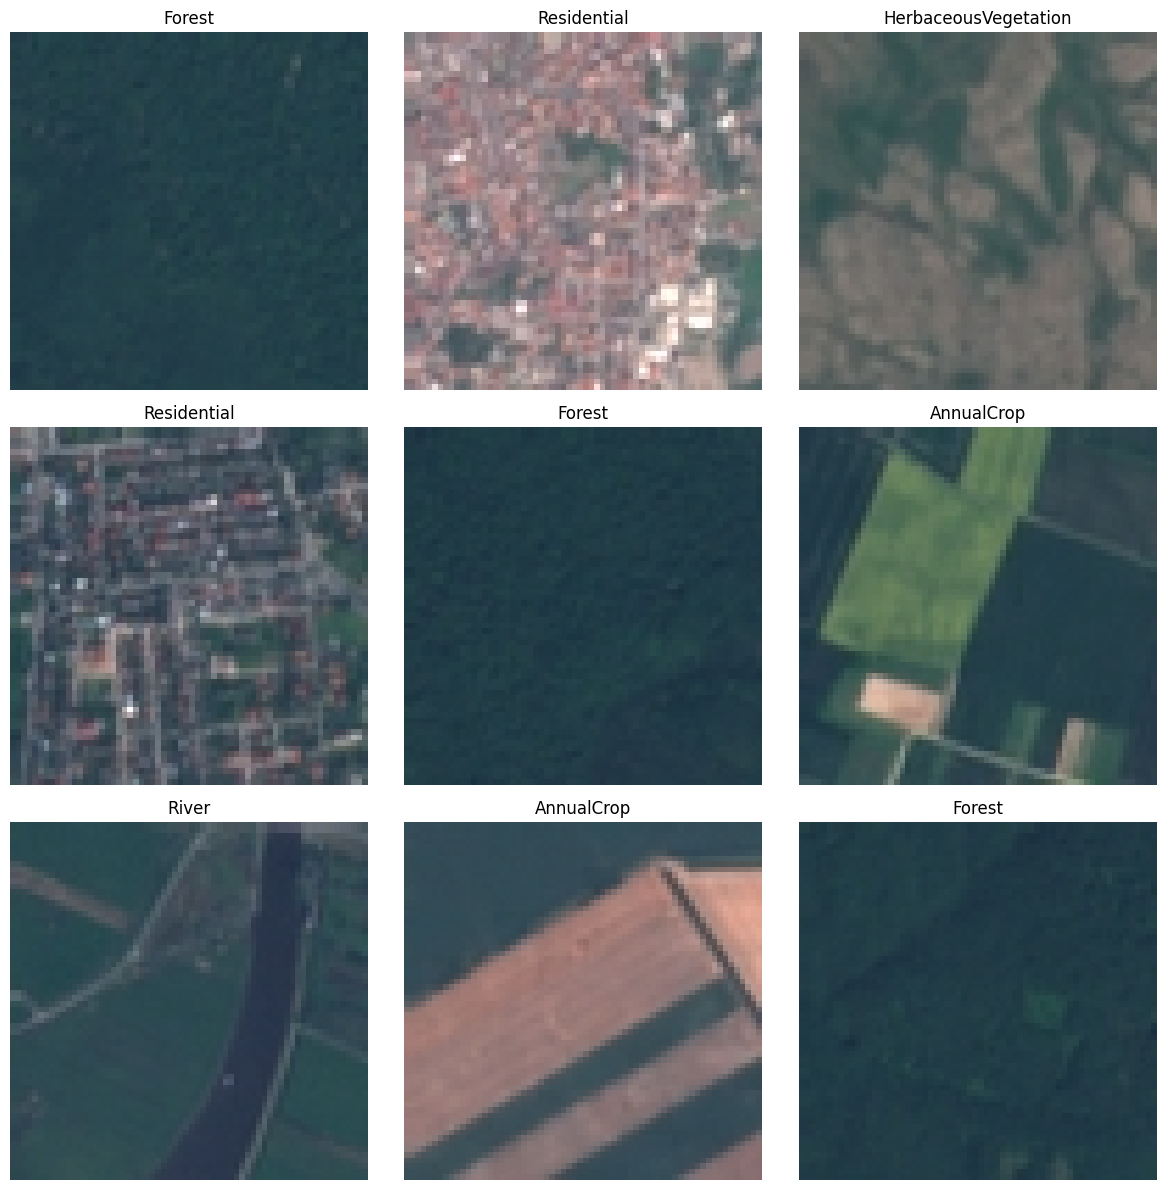

C:\ProgramData\miniconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 274s 393ms/step - accuracy: 0.5044 - loss: 1.5591 - val_accuracy: 0.6128 - val_loss: 1.1902 - learning_rate: 0.0010
Epoch 2/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 432s 640ms/step - accuracy: 0.7047 - loss: 0.8457 - val_accuracy: 0.6081 - val_loss: 1.3055 - learning_rate: 0.0010
Epoch 3/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 405s 600ms/step - accuracy: 0.7307 - loss: 0.7530 - val_accuracy: 0.7439 - val_loss: 0.7613 - learning_rate: 0.0010
Epoch 4/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 395s 585ms/step - accuracy: 0.7618 - loss: 0.6843 - val_accuracy: 0.6948 - val_loss: 1.1076 - learning_rate: 0.0010
Epoch 5/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 386s 572ms/step - accuracy: 0.7898 - loss: 0.6013 - val_accuracy: 0.6583 - val_loss: 1.0619 - learning_rate: 0.0010
Epoch 6/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 409s 606ms/step - accuracy: 0.8132 - loss: 0.5461 - val_accuracy: 0.5935 - val_loss: 1.3451 - learning_rate: 0.0010
Epoch 7/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 432s 639ms/step - accura

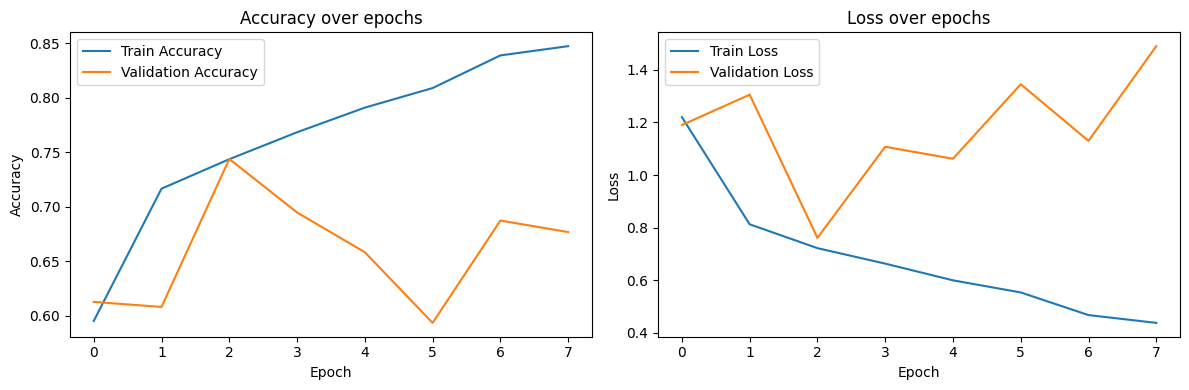

Exemples de prédictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


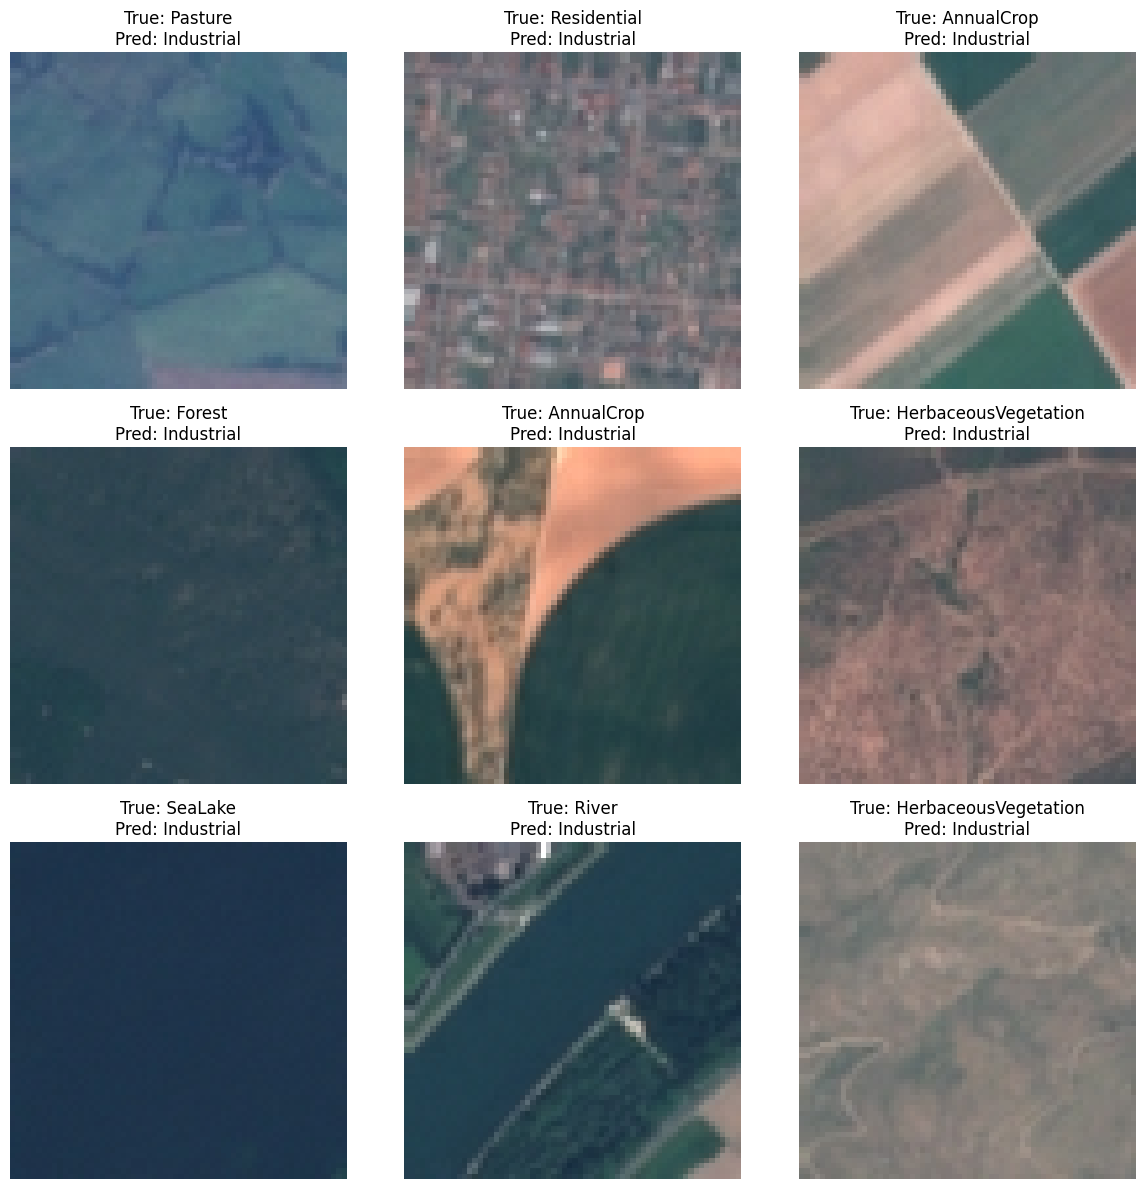

In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

## 1. Chargement du dataset EuroSAT
(ds_train, ds_val), ds_info = tfds.load(
    'eurosat/rgb',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
    shuffle_files=True
)

# Afficher les informations du dataset
print("Informations sur le dataset:")
print(ds_info)

## 2. Préparation des données
# Normalisation et préprocessing
def preprocess(image, label):
    # Conversion des uint8 en float32 et normalisation [0,1]
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Redimensionnement si nécessaire (les images EuroSAT sont déjà 64x64)
    return image, label

# Configuration des datasets
batch_size = 32
buffer_size = 1000

train_dataset = ds_train.map(
    preprocess, num_parallel_calls=tf.data.AUTOTUNE
).cache().shuffle(
    buffer_size
).batch(
    batch_size
).prefetch(
    tf.data.AUTOTUNE
)

val_dataset = ds_val.map(
    preprocess, num_parallel_calls=tf.data.AUTOTUNE
).batch(
    batch_size
).prefetch(
    tf.data.AUTOTUNE
)

## 3. Visualisation des échantillons
def plot_samples(dataset, num_samples=9):
    plt.figure(figsize=(12, 12))
    for i, (image, label) in enumerate(dataset.take(num_samples)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image.numpy())
        plt.title(ds_info.features['label'].int2str(label.numpy()))
        plt.axis('off')
    plt.tight_layout()
    plt.show()

print("Exemples d'images d'entraînement:")
plot_samples(ds_train)

## 4. Augmentation des données
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.1),
])

## 5. Création du modèle CNN avec traitement des caractéristiques satellites
def create_model(input_shape=(64, 64, 3), num_classes=10):
    model = tf.keras.Sequential([
        # Couche d'augmentation des données
        tf.keras.layers.InputLayer(input_shape=input_shape),
        data_augmentation,
        
        # Bloc de convolution 1
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.2),
        
        # Bloc de convolution 2
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),
        
        # Bloc de convolution 3
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.4),
        
        # Classification
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    
    return model

model = create_model()

## 6. Compilation et entraînement
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callback pour un meilleur suivi
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=3)
]

# Entraînement
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=val_dataset,
    callbacks=callbacks
)

## 7. Évaluation et visualisation des résultats
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_history(history)

## 8. Analyse des prédictions
def plot_predictions(dataset, model, num_samples=9):
    plt.figure(figsize=(12, 12))
    for i, (image, label) in enumerate(dataset.take(num_samples)):
        ax = plt.subplot(3, 3, i + 1)
        pred = model.predict(tf.expand_dims(image, axis=0))
        predicted_label = tf.argmax(pred, axis=1).numpy()[0]
        
        plt.imshow(image.numpy())
        plt.title(f"True: {ds_info.features['label'].int2str(label.numpy())}\n"
                 f"Pred: {ds_info.features['label'].int2str(predicted_label)}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

print("Exemples de prédictions:")
plot_predictions(ds_val, model)